# Select From Model - Regression Task.
Based on the importance of coefficients.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model as the estimator
alpha = 1.0  # You can adjust the alpha parameter as needed
lasso = Lasso(alpha=alpha)

# Create an instance of SelectFromModel using the Lasso estimator
sfm = SelectFromModel(lasso)

# Fit SelectFromModel on the training dataset
sfm.fit(X_train, y_train)

# Transform the training and testing datasets to select the top features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a regression model (e.g., LinearRegression) on the selected features
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_selected, y_train)

# Make predictions on the testing set using selected features
y_pred = regressor.predict(X_test_selected)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.6629874283048177


1. We load the California Housing dataset using fetch_california_housing and split it into training and testing sets.

2. We create a Lasso regression model (Lasso) as the estimator for feature selection. You can adjust the alpha parameter to control the level of regularization.

3. We create an instance of SelectFromModel using the Lasso estimator (sfm) and fit it on the training dataset. This will select the top features based on the Lasso coefficients.

4. We transform both the training and testing datasets to retain only the selected features.

5. We train a regression model (in this case, LinearRegression) on the selected features and make predictions on the test set.

Finally, we evaluate the model's performance using the Mean Squared Error (MSE)

# Select From Model - Classification Task.
Based on the importance of Features.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a Random Forest classifier as the estimator
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an instance of SelectFromModel using the Random Forest estimator
sfm = SelectFromModel(rf_classifier)

# Fit SelectFromModel on the entire dataset to obtain feature importances
sfm.fit(X, y)

# Get the feature importances (scores) from SelectFromModel
feature_importances = sfm.estimator_.feature_importances_

# Get the selected feature indices
selected_feature_indices = np.where(sfm.get_support())[0]

# Get the corresponding feature names for selected features
selected_feature_names = data.feature_names[selected_feature_indices]

# Ensure both arrays have the same length
assert len(selected_feature_names) == len(feature_importances), "Arrays must have the same length"

# Create a DataFrame to store feature importances and names
feature_importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importance values (optional)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plot feature importances (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=selected_feature_names)
plt.xlabel('Features')
plt.ylabel('Feature Importances')
plt.title('Feature Importances from SelectFromModel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Proceed with classification using selected features if desired


In [ ]:
len(feature_importances)

30

In [ ]:
selected_feature_names

array(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter',
       'worst area', 'worst concavity', 'worst concave points'],
      dtype='<U23')

# Pipeline in sklearn.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Step 1: Data Preprocessing (Scaling)
    ('feature_selector', SelectKBest(k=10)),    # Step 2: Feature Selection (SelectKBest)
    ('classifier', RandomForestClassifier())      # Step 3: Model Building (RandomForestClassifier)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also access individual components of the pipeline:
# - pipeline.named_steps['scaler'] for data preprocessing
# - pipeline.named_steps['feature_selector'] for feature selection
# - pipeline.named_steps['classifier'] for the classifier


Accuracy: 0.956140350877193


## A complete project with Pipeline.

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy: 0.9473684210526315


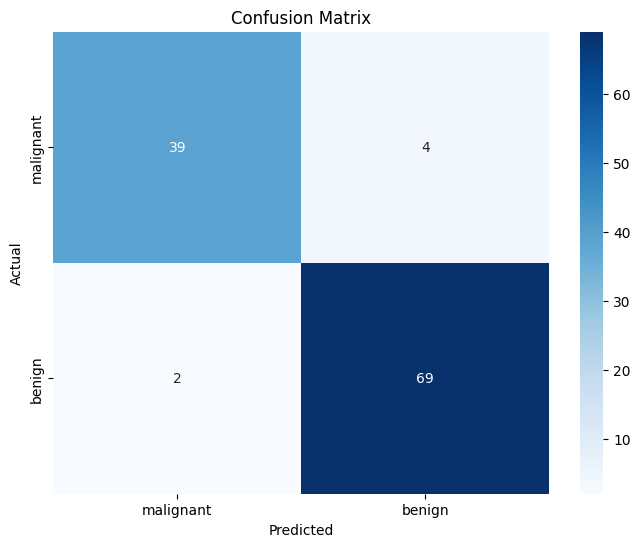

Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        43
      benign       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif  # Import SelectKBest and a scoring function
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with hyperparameter tuning
pipeline = Pipeline([
    ('scaler', StandardScaler()),                        # Data Preprocessing: Scaling
    ('feature_selector', SelectKBest(score_func=f_classif)),  # SelectKBest for feature selection
    ('classifier', XGBClassifier())                     # XGBoost Classifier
])

# Define the hyperparameter grid for tuning
param_grid = {
    'feature_selector__k': [5, 10, 15],               # Number of top features to select
    'classifier__n_estimators': [100, 200, 300],      # XGBoost hyperparameters
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best pipeline from hyperparameter tuning
best_pipeline = grid_search.best_estimator_

# Make predictions on the testing data using the best pipeline
y_pred = best_pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest - Accuracy: 0.956140350877193


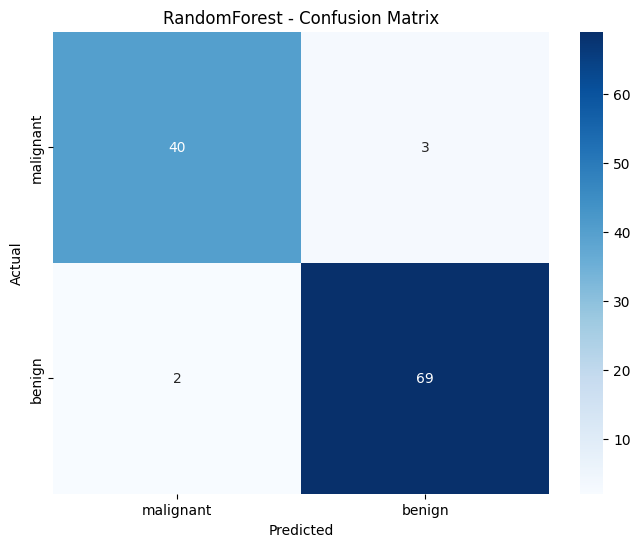

RandomForest - Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GradientBoosting - Accuracy: 0.956140350877193


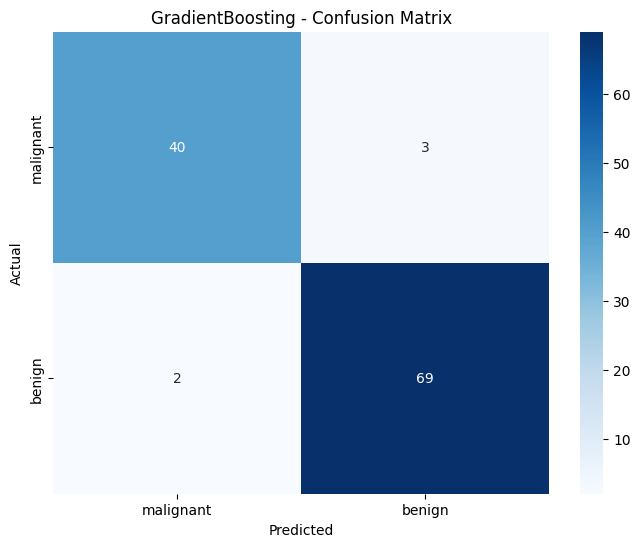

GradientBoosting - Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost - Accuracy: 0.956140350877193


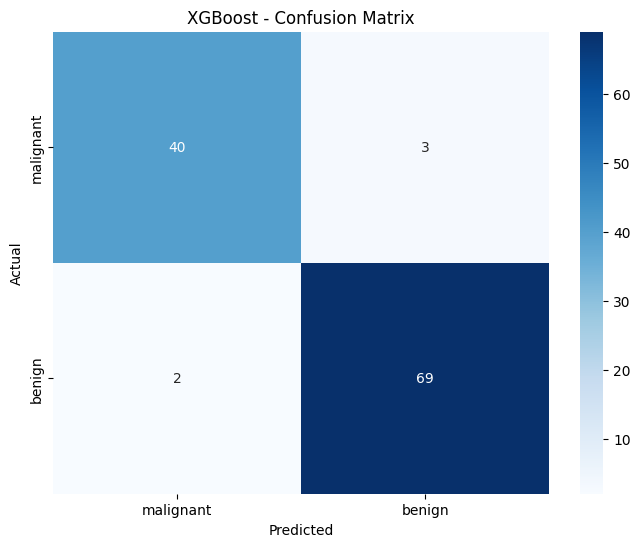

XGBoost - Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Best model for RandomForest:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selector',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='1.25*median')),
                ('classifier', RandomForestClassifier(max_depth=4))])
Best model for GradientBoosting:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selector',
                 SelectFromModel(estimator=GradientBoostingClassifier(),
                                 threshold='median')),
                ('classifier',
                 GradientBoostingClassifier(max_dep

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers to try
classifiers = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier())
]

# Create a pipeline with hyperparameter tuning for each classifier
best_models = {}  # To store the best model for each classifier

for classifier_name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),                        # Data Preprocessing: Scaling
        ('feature_selector', SelectFromModel(classifier)),  # SelectFromModel for feature selection
        ('classifier', classifier)                          # Classifier to be tried
    ])

    # Define the hyperparameter grid for tuning for each classifier
    param_grid = {
        'feature_selector__threshold': ['mean', 'median', '1.25*median'],  # Threshold for feature selection
        'classifier__n_estimators': [100, 200, 300],                    # Classifier-specific hyperparameters
        'classifier__max_depth': [3, 4, 5],
    }

    # Create a GridSearchCV object for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train, y_train)

    # Get the best pipeline and best hyperparameters for this classifier
    best_pipeline = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Store the best model for this classifier
    best_models[classifier_name] = best_pipeline

    # Make predictions on the testing data using the best pipeline
    y_pred = best_pipeline.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier_name} - Accuracy:", accuracy)

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    # Generate classification report
    class_report = classification_report(y_test, y_pred, target_names=data.target_names)
    print(f"{classifier_name} - Classification Report:\n", class_report)

# Print the best model for each classifier
for classifier_name, best_model in best_models.items():
    print(f"Best model for {classifier_name}:\n", best_model)
